In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pylab as pl
pl.style.use('fivethirtyeight')
import datetime
import statsmodels.api as sma
import scipy
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

In [3]:
data = np.load('MTA_Fare.npy').astype(float)
data[data == -1] = float('nan')

In [4]:
data.shape

(600, 23, 194)

In [5]:
weeklysums = np.nansum(data, axis=(0,1))

In [6]:
deviations = 3
thresh = [weeklysums.mean() - deviations*weeklysums.std(), weeklysums.mean() + deviations*weeklysums.std()]

In [7]:
weeks_array = np.repeat(datetime.date(year=2010, month=5, day=21), 194) + datetime.timedelta(weeks=1)*np.arange(194)

In [8]:
week = np.where((weeklysums<thresh[0])|(weeklysums>thresh[1]))[0][0]

In [9]:
# Question 1

weeks_array[week]

datetime.date(2012, 10, 19)

The event is Hurricane Sandy.

In [10]:
ridetype_sums = np.nansum(data, axis=0)

In [11]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

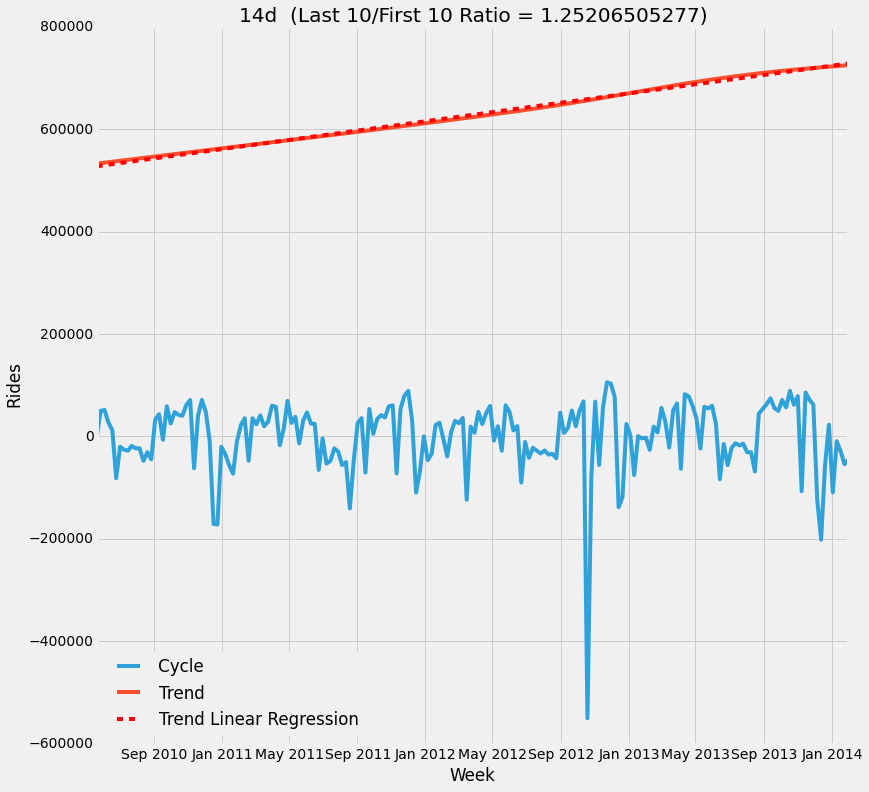

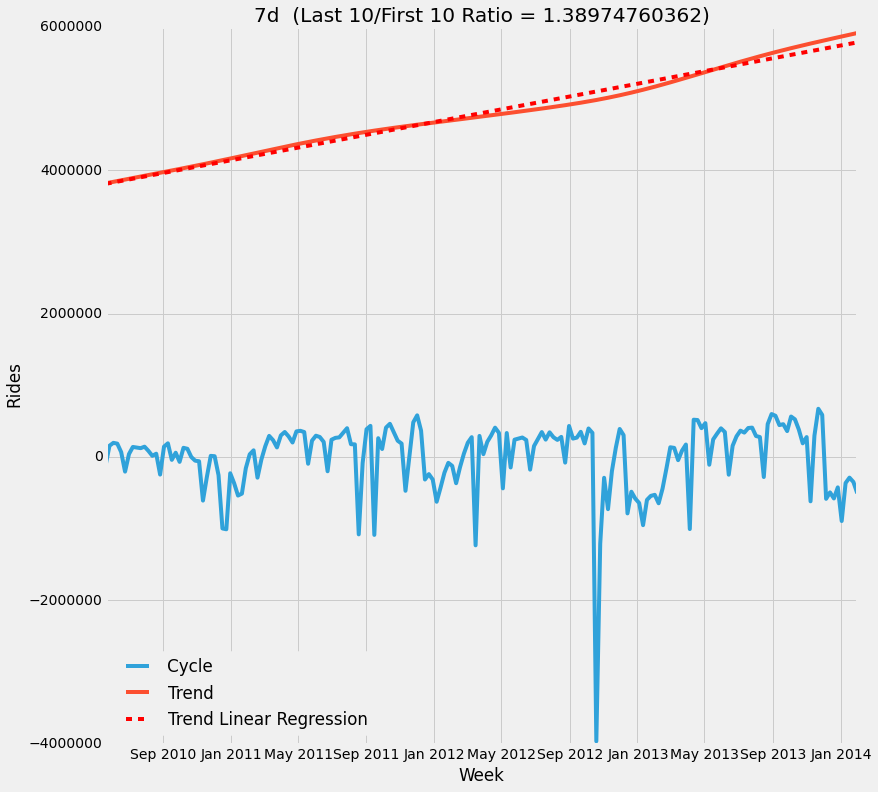

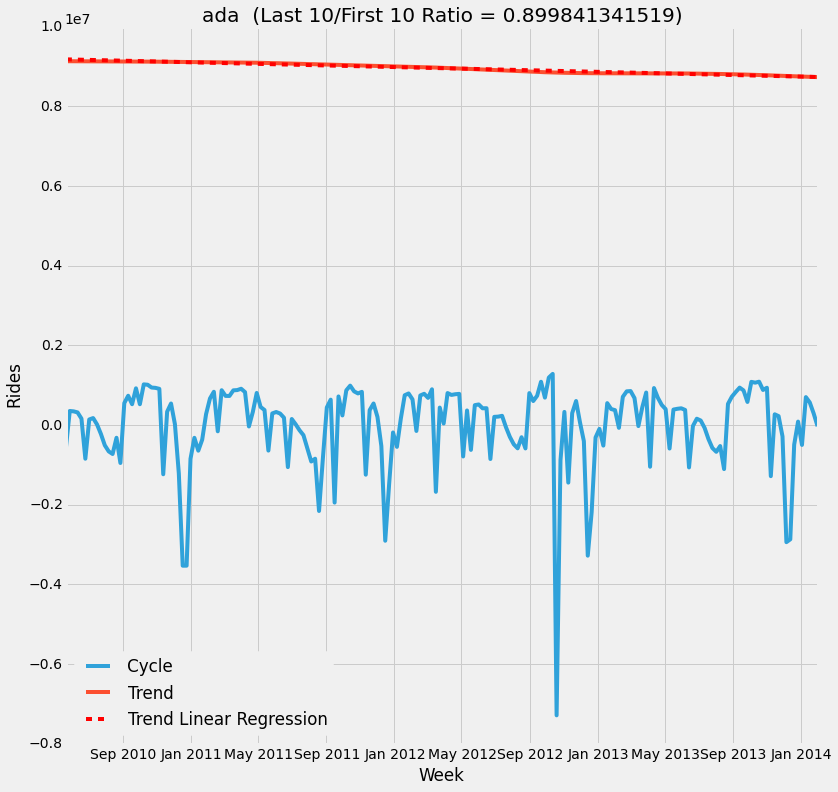

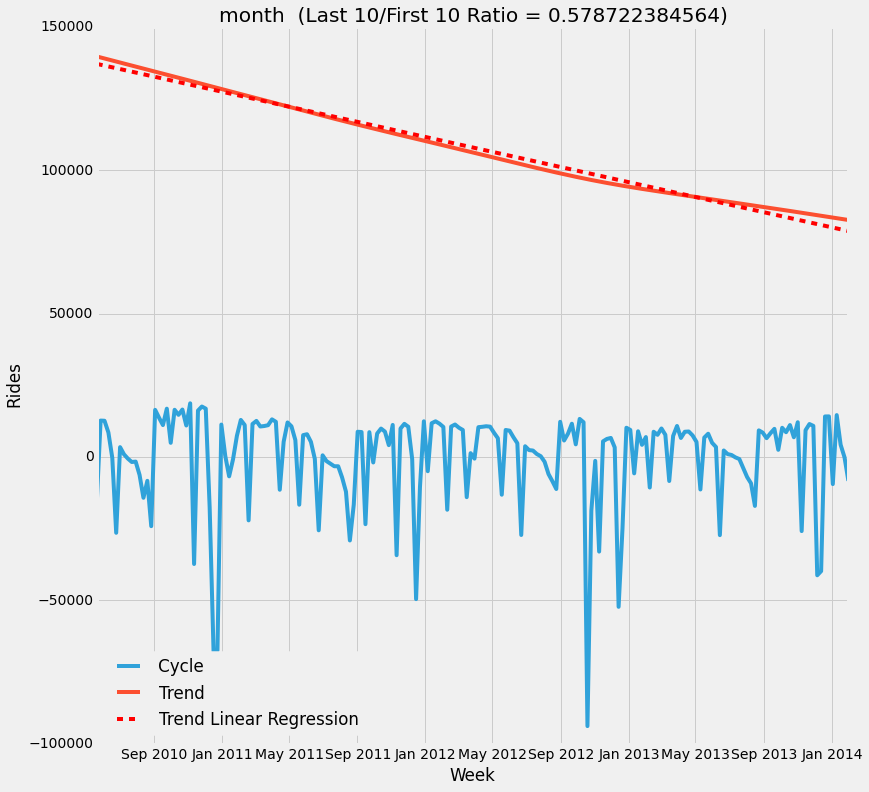

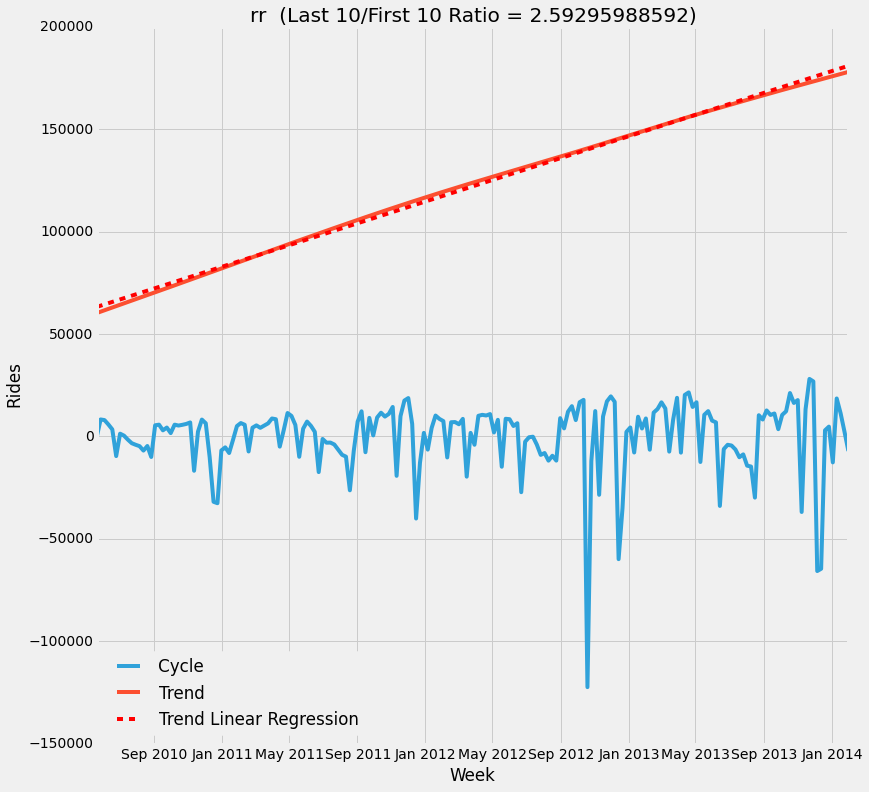

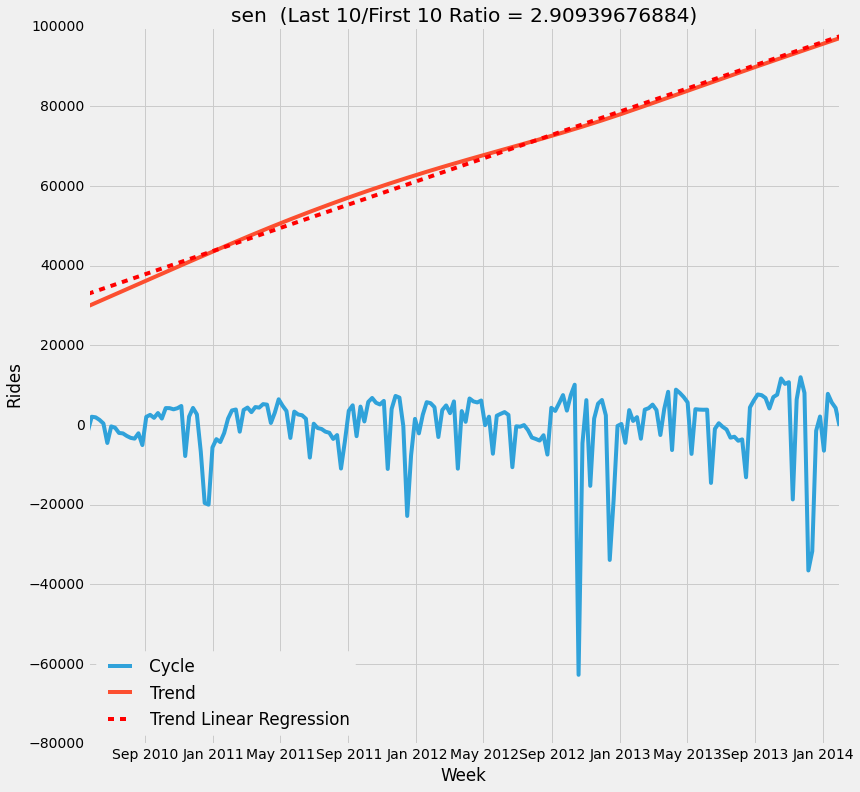

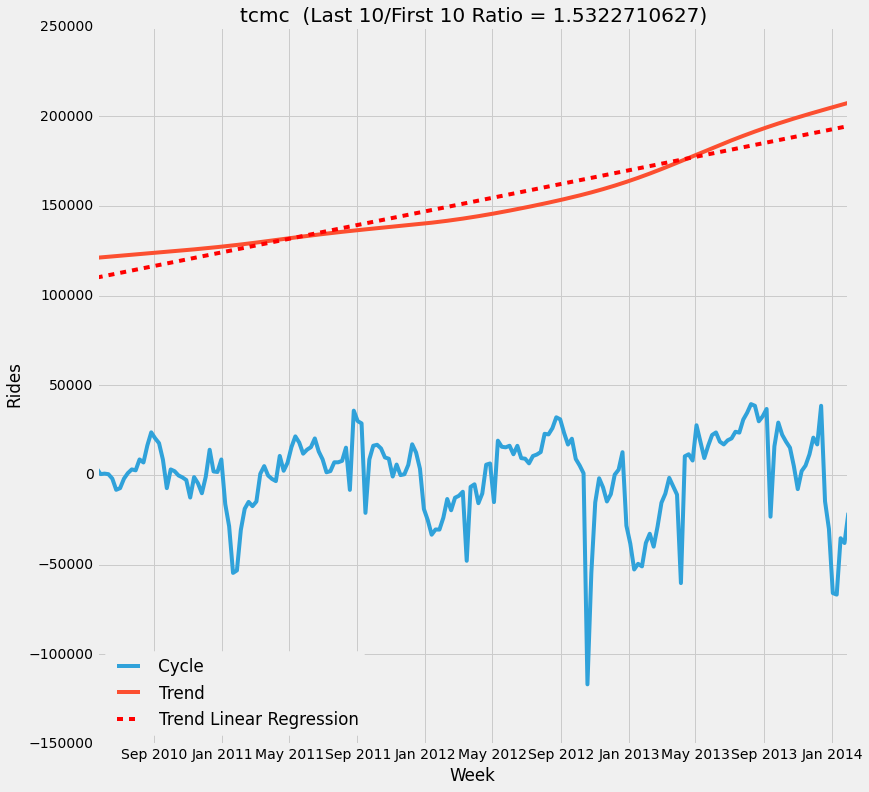

In [12]:
# Problem 2

x = np.arange(len(ridetype_sums[0]))
for i in range(len(ridetype_sums)):
    
    # Detrend the data
    cycle, trend = sma.tsa.filters.hpfilter(ridetype_sums[i], lamb = 270400)
    
    # Do linear regression to find out how steady the trend's change has been.
    mod = smf.ols(formula = 't ~ w', data={'t': trend, 'w': x}).fit()
    
    # Check if it's been steady, if not skip it
    # If it's been steady a linear model will fit it well
    if mod.rsquared < .9:
        continue
        
    # Get usage ratio between last 10 and first 1o weeks
    ratio = np.nansum(ridetype_sums[i][-10:])/np.nansum(ridetype_sums[i][:10])
    
    # Plot
    figure, ax = pl.subplots(figsize=(12,12))
    ax.plot(weeks_array, cycle, label='Cycle')
    ax.plot(weeks_array, trend, label='Trend')
    ax.plot(weeks_array, mod.params[0] + mod.params[1]*x, 'r--', label='Trend Linear Regression')
    ax.set_title(ridetype[i] + "  (Last 10/First 10 Ratio = %s) " % ratio)
    ax.set_xlabel('Week')
    ax.set_ylabel('Rides')
    ax.legend(loc='lower left')

In [13]:
stations = np.nansum(data, axis=1)

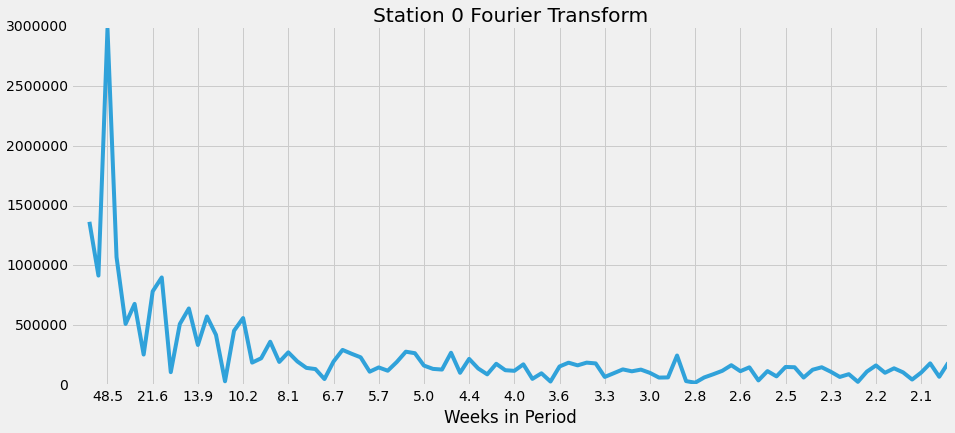

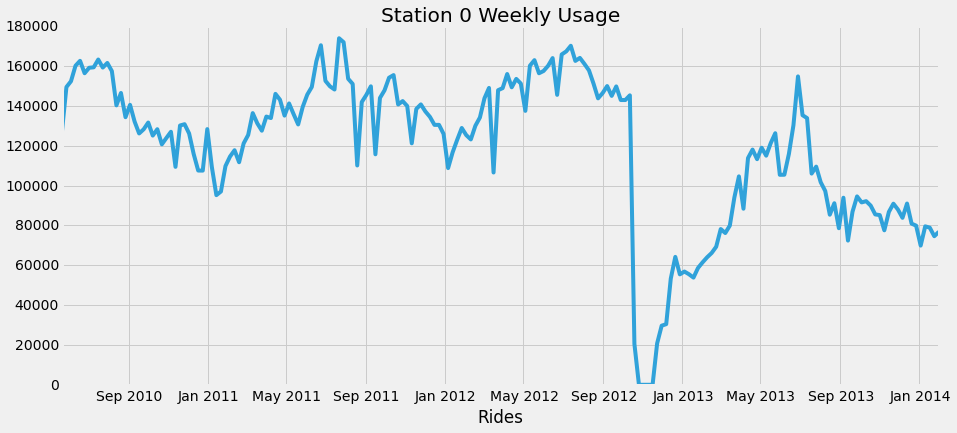

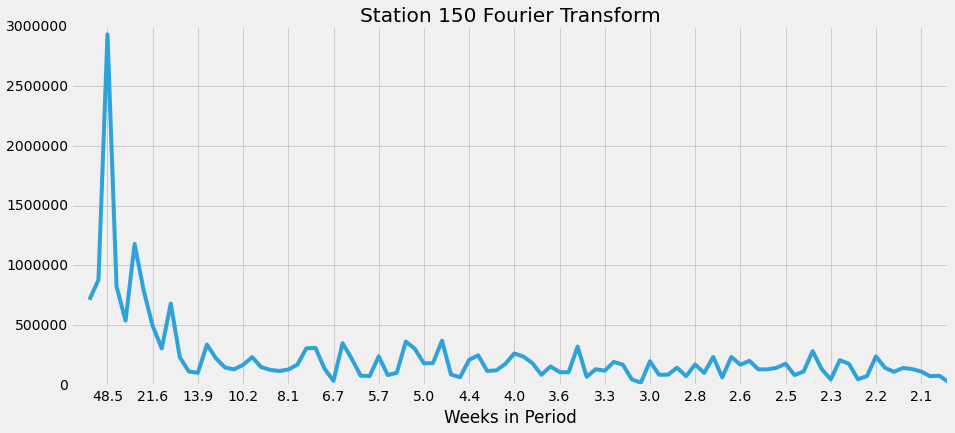

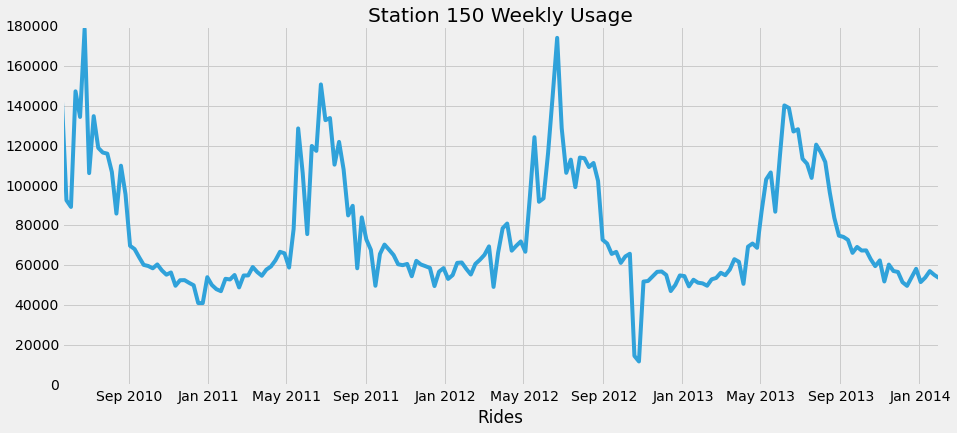

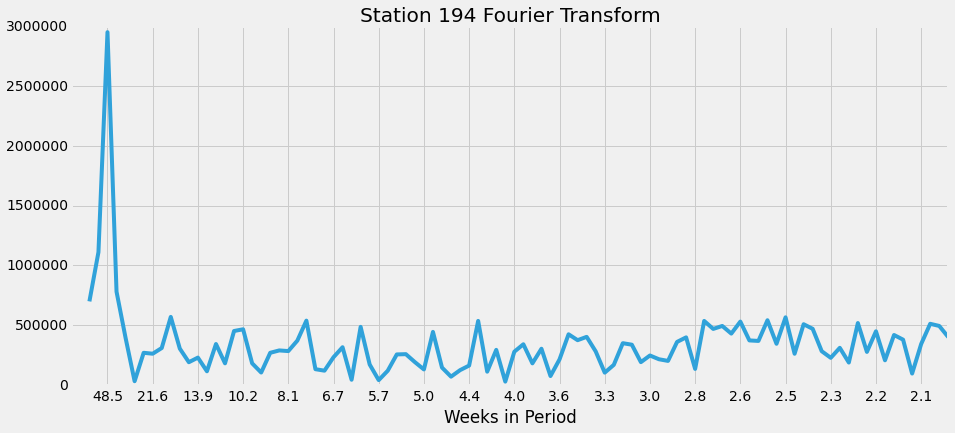

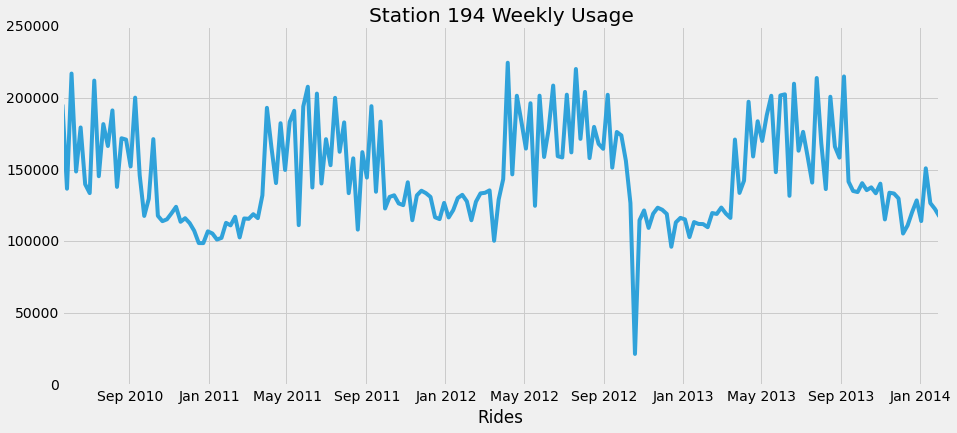

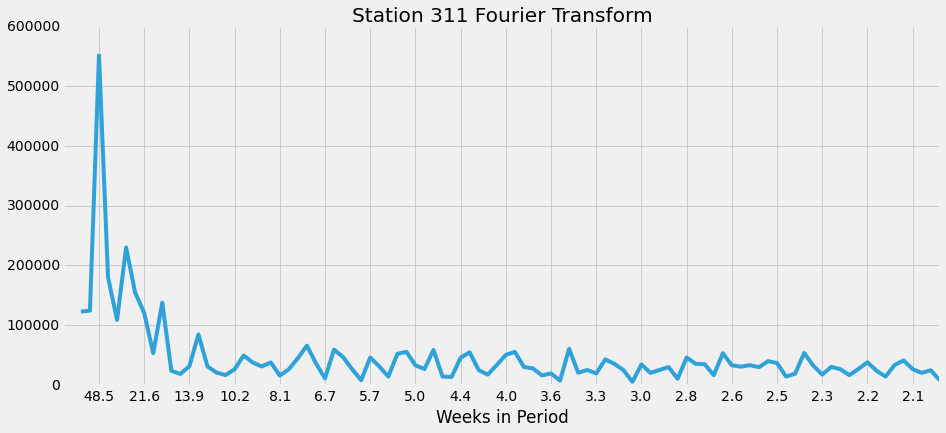

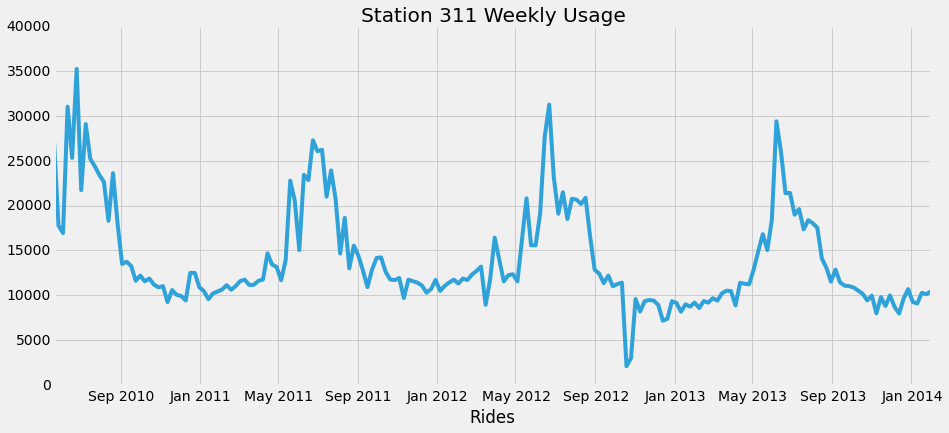

In [14]:
# Problem 3
for i in range(len(stations)):
    # Fourier Transform
    f = np.abs(np.fft.rfft(stations[i]))[2:]
    
    # Check if there is a strong period at ~52 weeks
    if f[2] > (np.mean(f) + 7.5*np.std(f)):
    
        # Get x axis for FFT
        x = np.fft.rfftfreq(len(stations[0]), 1.0)[2:]

        figure, ax = pl.subplots(figsize=(14,6))
        ax.plot(x, f)

        # Set the xticks explicitely so the one close to 52 is used
        ax.set_xticks(x[2::5])
        # Assign to _ to avoid printing list of tick objects
        _ = ax.set_xticklabels([ "%2.1f"%(1/j) for j in ax.get_xticks()])

        ax.set_title('Station %s Fourier Transform' % i)
        ax.set_xlabel('Weeks in Period')
        
        figure, ax = pl.subplots(figsize=(14,6))
        ax.plot(weeks_array, stations[i])
        ax.set_title('Station %s Weekly Usage' % i)
        ax.set_xlabel('Week')
        ax.set_xlabel('Rides')

All 4 stations peak in the summer.  I would guess that the stations are located in touristy areas such as Times Square.